<a href="https://colab.research.google.com/github/Likhithluck/Capstone-Project/blob/tarun/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as panda
from huggingface_hub import login
from datasets import load_dataset
from PIL import Image as img
import matplotlib.pyplot as plt
from google.colab import files
import cv2
import numpy as np
import pytesseract

In [37]:
# !pip install pytesseract

In [7]:
from google.colab import userdata
key=userdata.get('hugging_face_key')

In [8]:
login(token=key)

In [9]:
dataset1 = load_dataset('mychen76/invoices-and-receipts_ocr_v1')
dataset2 = load_dataset('mychen76/invoices-and-receipts_ocr_v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/782 [00:00<?, ?B/s]

(…)-00000-of-00001-76ffc8319f74dd65.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

(…)-00000-of-00001-af2d92d1cee28514.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

(…)-00000-of-00001-894b4e1f736b5732.parquet:   0%|          | 0.00/14.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/125 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/70 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/912 [00:00<?, ?B/s]

(…)-00000-of-00002-801e1aea0f0adc30.parquet:   0%|          | 0.00/233M [00:00<?, ?B/s]

(…)-00001-of-00002-2e5ab49d1f705bff.parquet:   0%|          | 0.00/134M [00:00<?, ?B/s]

(…)-00000-of-00001-5e49167f3ab7fa83.parquet:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

(…)-00000-of-00001-a34ca26ac5064310.parquet:   0%|          | 0.00/29.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2843 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/225 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/170 [00:00<?, ? examples/s]

In [10]:
uploaded = files.upload()

Saving Airinvoice.jpg to Airinvoice.jpg


In [19]:
invoice = img.open('Airinvoice.jpg')

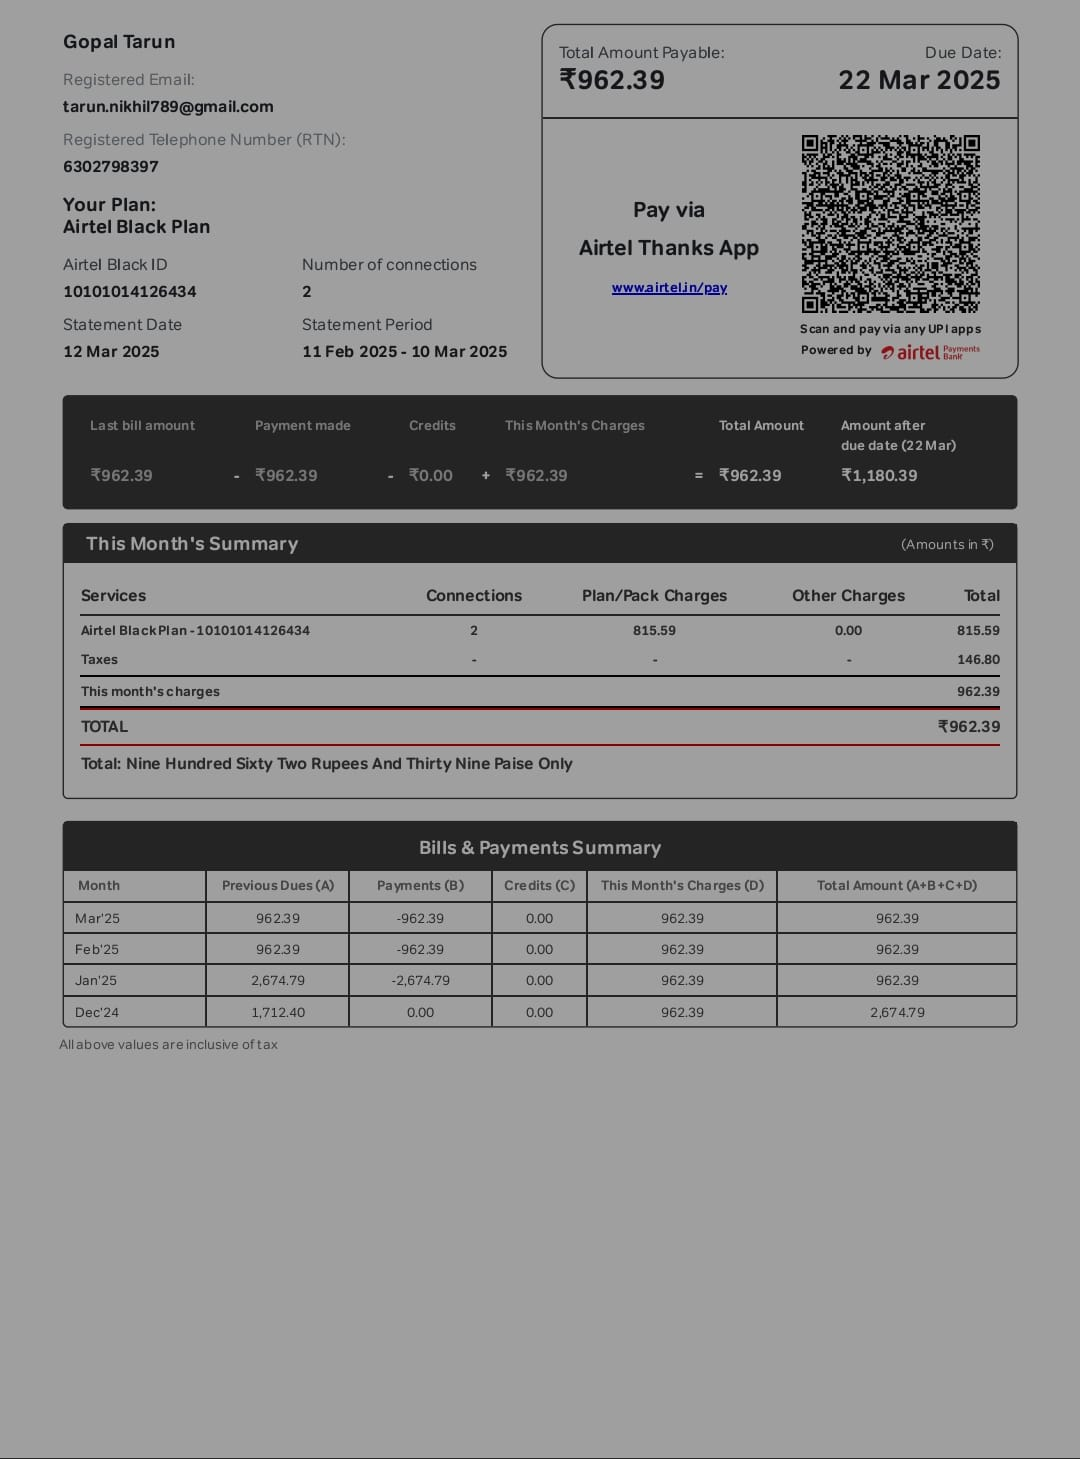

In [20]:
invoice

In [ ]:
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to binarize the image
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(binary_image, (5, 5), 0)

    # Define a kernel for dilation and erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Dilation
    dilated_image = cv2.dilate(blurred_image, kernel, iterations=1)

    # Erosion
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

    # Deskewing function
    def deskew(image):
        coords = np.column_stack(np.where(image > 0))
        angle = cv2.minAreaRect(coords)[-1]

        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle

        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

        return rotated

    # Deskew the image
    deskewed_image = deskew(eroded_image)

    # Resize the image (optional, adjust the scale as needed)
    resized_image = cv2.resize(deskewed_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    return resized_image